# Import

In [1]:
import scipy
import numpy as np
import os
import matplotlib.pyplot as plt

# Affichage

In [16]:
def get_data_from_file(filepath, seq_len):
    data = scipy.io.loadmat(filepath)
    return data['voltage'][0][:seq_len].astype(np.float64), data['current'][0][:seq_len].astype(np.float64), data['f1'][0][:seq_len].astype(np.float64), data['f2'][0][:seq_len].astype(np.float64), data['f3'][0][:seq_len].astype(np.float64)


def generate_data(dossier, seq_len=1900, nb_channel=5):

    data = []
    
    for file in os.listdir(dossier):
        filepath = os.path.join(dossier, file)
        if os.path.isfile(filepath):
            data_v, data_c, data_f1, data_f2, data_f3 = get_data_from_file(filepath, seq_len)
            list_data_from_file = [data_v, data_c, data_f1, data_f2, data_f3]

            data.append(list_data_from_file)

    nb_files = len(data)
    return np.array(data).reshape(nb_files, nb_channel, 1, seq_len)

def affichage_data(signal, seq_len=1900, nb_channels=5):
    # Diviser le plot en 5 parties
    _, axs = plt.subplots(nb_channels, 1, figsize=(12, 10), sharex=True)

    # Affichage du signal réel
    for i in range(nb_channels):
        axs[i].plot(signal[np.random.randint(0, signal.shape[0])][i].reshape(seq_len), label=f'Signal réel {i+1}')
        axs[i].grid()
    
    plt.suptitle("Signal")
    plt.show()


In [6]:
# Paramètres d'entraînement
seq_len = 1900
nb_channels = 5

In [19]:
folder_path = "/home/user/Documents/DonnéesEntrainement"

data_echantillon = generate_data(folder_path, seq_len, nb_channel=nb_channels)

In [20]:
data_echantillon.shape

(312697, 5, 1, 1900)

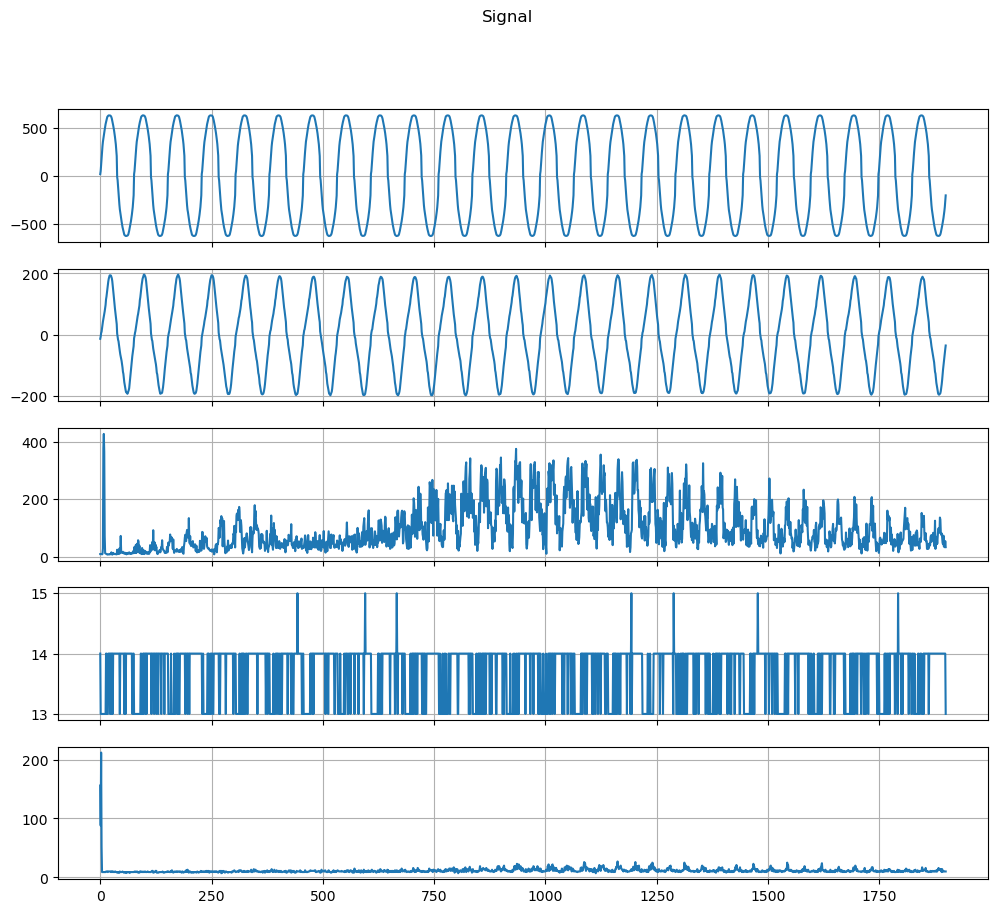

In [59]:
affichage_data(data_echantillon, seq_len, nb_channels=nb_channels)

# Affiche un canal en particulier

In [23]:
def affichage_canal(data_signal, canal_a_afficher, nb_signal_a_afficher):
    # Diviser le plot en 5 parties
    _, axs = plt.subplots(nb_signal_a_afficher, 1, figsize=(12, 10), sharex=True)

    # Affichage du signal réel
    for i in range(nb_signal_a_afficher):
        axs[i].plot(data_signal[np.random.randint(0, data_signal.shape[0])][canal_a_afficher].reshape(data_signal.shape[3]), label=f'Signal réel {i+1}')
        axs[i].grid()
    
    plt.suptitle("Signal")
    plt.show()

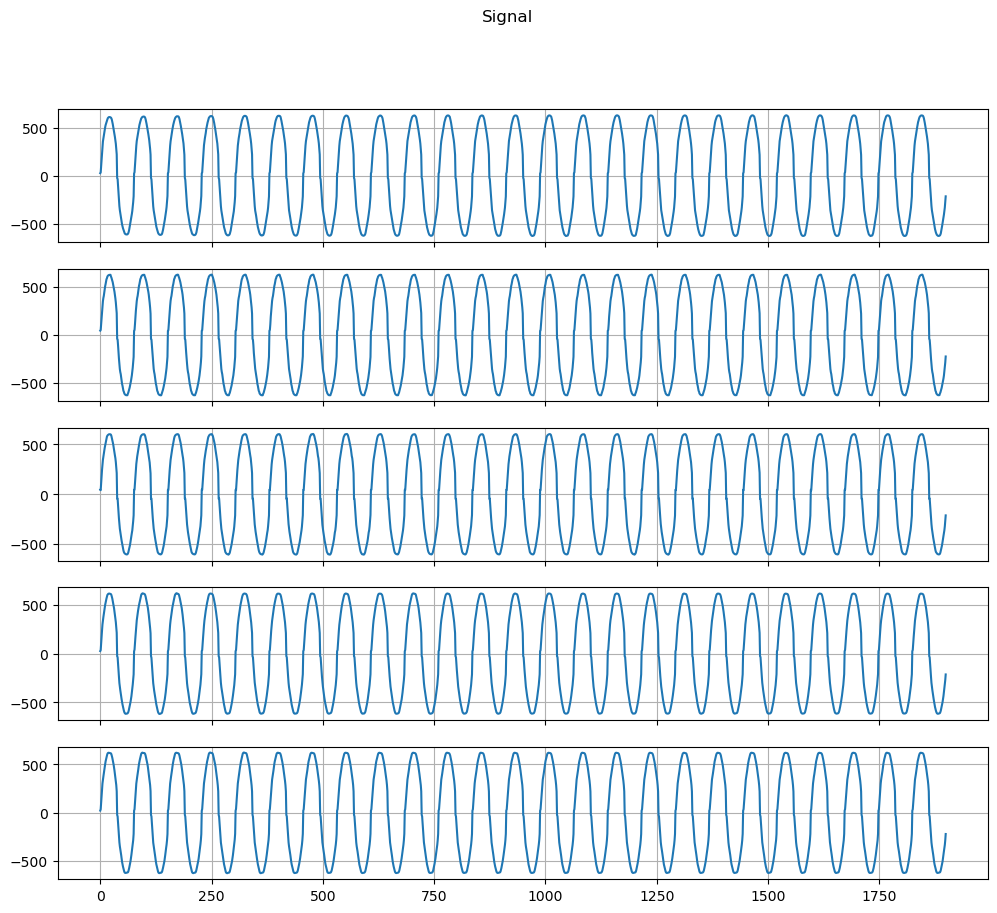

In [62]:
canal_a_afficher = 0
nb_signal_a_afficher = 5

affichage_canal(data_echantillon, canal_a_afficher, nb_signal_a_afficher)